<a href="https://colab.research.google.com/drive/1JbMpw_nQaCq5WAZmY0iDWVEWWV4cgH9H?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancerous and Healthy Tissue Classifier through esophagus microscopic images

In [66]:
from IPython.display import Image

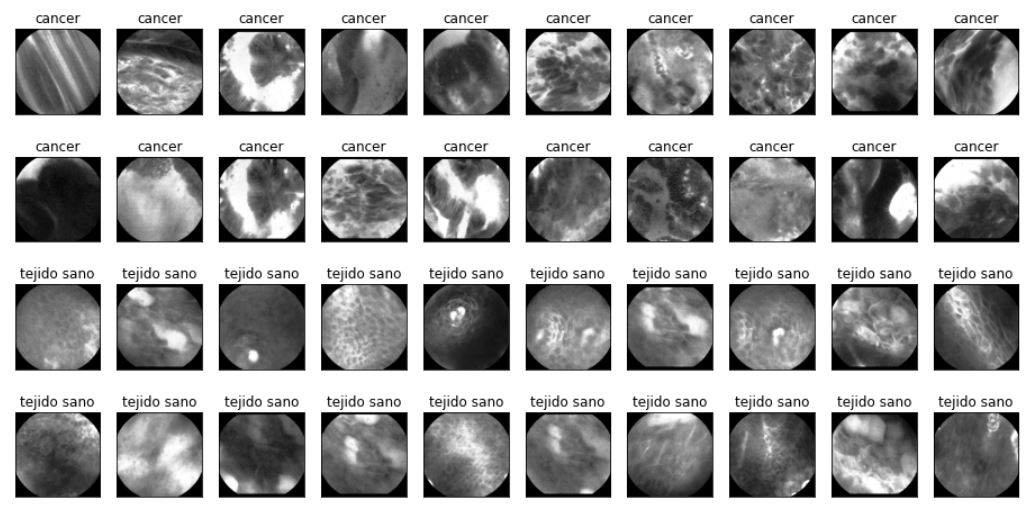

In [2]:
Image('https://raw.githubusercontent.com/contepablod/QCNNCancerClassifier/master/Esophagus%20Cancer.JPG')

## 1. Load required libraries

In [1]:
import os           
import random       

import numpy as np   
import pandas as pd  

from skimage import io 

from sklearn.model_selection import train_test_split   
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt        
import seaborn as sns

### 2.1 Required Functions

In [2]:
def matrix_confusion(yt, yp):
    data = {'Y_Real': yt,
            'Y_Prediccion': yp}

    df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
    confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, fmt='g')

    plt.show()

## 2. Read Data

### 2.1 Read Labels (Y)

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/Datos/ClasesImagenes.csv", usecols=[1,2])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filename  5063 non-null   object
 1   class_number    5063 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 79.2+ KB


In [6]:
data['class_number'].value_counts(sort=False)  

0    1469
1    3594
Name: class_number, dtype: int64

Class 0 belongs to Healthy Tissue y Class 1 to Cancerous Tissue

In [7]:
Y = data['class_number']

### 2.2 Read Images (X)

In [8]:
data['image_filename']

0          im_4_0.png
1         im_21_0.png
2          im_9_0.png
3          im_8_0.png
4         im_15_0.png
            ...      
5058    im_114_55.png
5059      im_7_55.png
5060     im_52_55.png
5061     im_10_55.png
5062    im_111_55.png
Name: image_filename, Length: 5063, dtype: object

## Images can be dowloaded from:
https://github.com/contepablod/QCNNCancerClassifier/tree/master/CarpetaImagenes

We read them from local disk

In [9]:
path = "C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\ML-AI-WA\\Perceptron\\CarpetaImagenes\\"

In [11]:
%time  img = data['image_filename'].apply(lambda x: io.imread(path + x, as_gray=True))

CPU times: total: 5.08 s
Wall time: 1min 16s


- Dimension 0: 260 up-to-down pixels rows
- Dimension 1: 260 left-to-right pixel columns

####  Images to vectors

In [12]:
img.shape

(5063,)

In [13]:
img[0].shape

(260, 260)

In [14]:
IMG = np.stack(img, axis=0)    
IMG.shape

(5063, 260, 260)

Then flatten the 2D matrix (260x260 pixels) of each image, to obtain one vector per image. 

In [15]:
X = IMG.reshape(5063, -1) # se puede poner 67600 en vez de -1
X.shape

(5063, 67600)

##### Image Visualizer

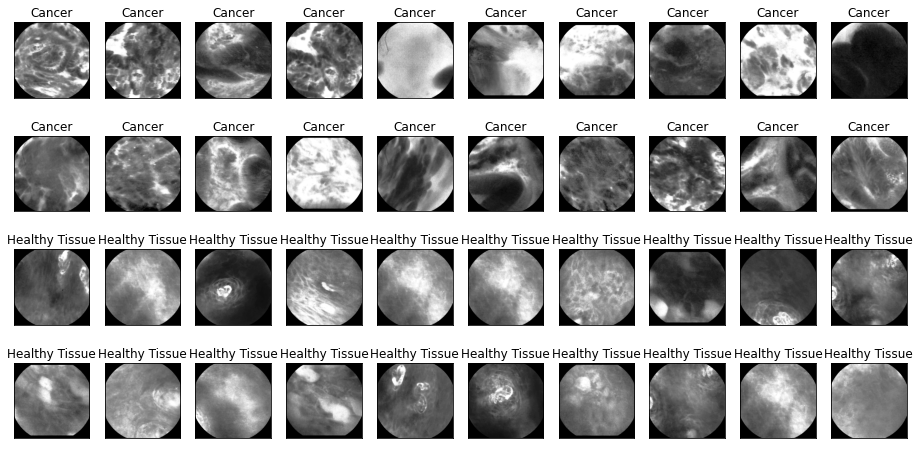

In [17]:
byClass = data.groupby('class_number')

n = 20
c = random.sample(byClass.get_group(1).index.tolist(), n)
s = random.sample(byClass.get_group(0).index.tolist(), n)


fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4
for i in range(0, columns * rows):
    fig.add_subplot(rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('Cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('Healthy Tissue')
        plt.xticks([])
        plt.yticks([])
plt.show()

## 3. Perceptron Training

### 3.1  Train and Test Sets creation

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    shuffle=True, random_state=0)

In [19]:
print("Training set")
print("X: ", X_train.shape)
print("Y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Healthy Tissue:        ', counts[0],'\nCancer: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("Y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Healthy Tissue:         ', counts[0],'\nCancer: ', counts[1],'\n')

Training set
X:  (3544, 67600)
Y:  (3544,)
Healthy Tissue:         1043 
Cancer:  2501 

Test set
X:  (1519, 67600)
Y:  (1519,)
Healthy Tissue:          426 
Cancer:  1093 



### 3.2  Perceptron Training

In [20]:
model_p = Perceptron(max_iter=50, random_state=0, verbose=True)
model_p.fit(X_train,y_train)             

-- Epoch 1
Norm: 1123.26, NNZs: 67600, Bias: -39.000000, T: 3544, Avg. loss: 1641.286726
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1709.08, NNZs: 67600, Bias: -56.000000, T: 7088, Avg. loss: 1415.700003
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 2155.80, NNZs: 67600, Bias: -69.000000, T: 10632, Avg. loss: 1231.936834
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 2616.13, NNZs: 67600, Bias: -76.000000, T: 14176, Avg. loss: 1124.851144
Total training time: 1.94 seconds.
-- Epoch 5
Norm: 3021.59, NNZs: 67600, Bias: -75.000000, T: 17720, Avg. loss: 1133.721658
Total training time: 2.45 seconds.
-- Epoch 6
Norm: 3379.11, NNZs: 67600, Bias: -74.000000, T: 21264, Avg. loss: 971.851823
Total training time: 2.94 seconds.
-- Epoch 7
Norm: 3724.07, NNZs: 67600, Bias: -66.000000, T: 24808, Avg. loss: 937.594908
Total training time: 3.40 seconds.
-- Epoch 8
Norm: 4026.70, NNZs: 67600, Bias: -68.000000, T: 28352, Avg. loss: 855.373414
Total training time: 3.84 seconds.
-- Ep

Perceptron(max_iter=50, verbose=True)

In [21]:
print("Train Set Accuracy: %.2f%%" % (model_p.score(X_train, y_train)*100.0))
print("Test Set Accuracy: %.2f%%" % (model_p.score(X_test, y_test)*100.0))

Train Set Accuracy: 95.49%
Test Set Accuracy: 90.19%


In [22]:
y_pred = model_p.predict(X_test) 

In [23]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy: 90.19%


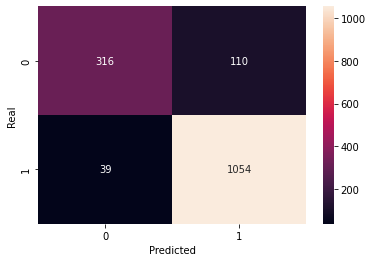

In [24]:
matrix_confusion(y_test, y_pred)

## 4. Percetron Training with alpha and penalty

In [25]:
model_mp = Perceptron(max_iter=1000, random_state=0, verbose=False, alpha=0.0001) 
model_mp.fit(X_train,y_train)                                  

print("Train Set Accuracy: %.2f%%" % (model_mp.score(X_train, y_train)*100.0))
print("Test Set Accuracy: %.2f%%" % (model_mp.score(X_test, y_test)*100.0))

Train Set Accuracy: 95.49%
Test Set Accuracy: 90.19%


In [26]:
y_pred = model_mp.predict(X_test)

In [27]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy: 90.19%


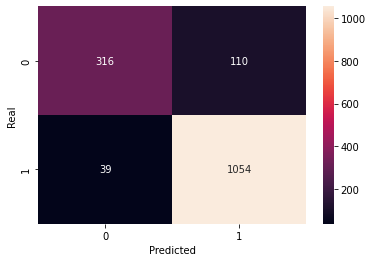

In [28]:
matrix_confusion(y_test, y_pred)

In [31]:
model_mp1 = Perceptron(max_iter=1000,  random_state=0, verbose=False, alpha=0.000001, penalty='l2') # Adds L2 penalty
model_mp1.fit(X_train,y_train) 

print("Train Set Accuracy: %.2f%%" % (model_mp1.score(X_train, y_train)*100.0))
print("Test Set Accuracy: %.2f%%" % (model_mp1.score(X_test, y_test)*100.0))

Train Set Accuracy: 98.59%
Test Set Accuracy: 92.03%


In [32]:
y_pred = model_mp1.predict(X_test)  #pasa cada una de las imágenes de X_test por el modelo

In [33]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy: 92.03%


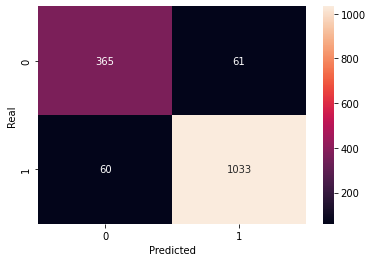

In [34]:
matrix_confusion(y_test, y_pred)

## 5. Quantum Machine Learning - QCNN Training

In [1]:
# Pytorch
import torch, torchvision, torch.utils
from torch import Tensor
from torch import cat
from torch.autograd.grad_mode import no_grad
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss, BCELoss, CrossEntropyLoss, MSELoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F
from torchviz import make_dot

# Qiskit
from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.opflow import AerPauliExpectation
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
from qiskit_machine_learning.neural_networks import TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector

## Classified Images can be download from:
https://github.com/contepablod/QCNNCancerClassifier/tree/master/Imagenes_Clasificadas_Random_Split

We read them from local disk:

In [33]:
train_data = torchvision.datasets.ImageFolder('C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\ML-AI-WA\\Perceptron\\Imagenes_Clasificadas_Random_Split\\Train', transform=transforms.Compose([transforms.ToTensor()]))
test_data = torchvision.datasets.ImageFolder('C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\ML-AI-WA\\Perceptron\\Imagenes_Clasificadas_Random_Split\\Test', transform=transforms.Compose([transforms.ToTensor()]))

Input Tensor Dimension

In [34]:
train_data[0][0].shape

torch.Size([3, 260, 260])

In [35]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=1)
test_loader = DataLoader(test_data, shuffle=True, batch_size=1)

## Show Images

In [36]:
# False is no cancer (0) and True, yes (1)
print((train_loader.dataset.class_to_idx))

{'False': 0, 'True': 1}


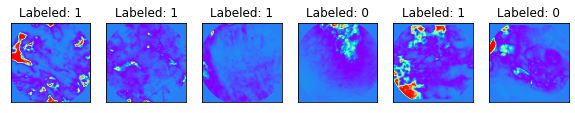

In [37]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 10))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap=plt.cm.rainbow)
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title(f"Labeled: {targets[0].item()}")

    n_samples_show -= 1

## How a Hybrid Neural Networks works?

In [38]:
Image(url='https://raw.githubusercontent.com/contepablod/QCNNCancerClassifier/master/hybridnetwork.png') 

### Quantum Instance Declaration

In [4]:
qi = QuantumInstance(Aer.get_backend("aer_simulator_statevector"))

## Interacion between Quantum Node and Convolutional Neural Network

In [40]:
Image(url='https://raw.githubusercontent.com/contepablod/QCNNCancerClassifier/master/neuralnetworkQC.png') 

### Quantum Neural Network Definition

In [2]:
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qnn = TwoLayerQNN(
        2,
        feature_map,
        ansatz,
        input_gradients=True,
        exp_val=AerPauliExpectation(),
        quantum_instance=qi,
    )
    return qnn

In [5]:
qnn = create_qnn()

#### Circuit Graph

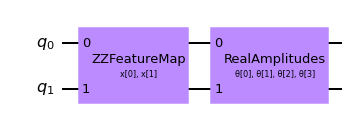

In [6]:
qnn.circuit.draw(output='mpl')

#### ZZFeatureMap Graph / Second-order Pauli-Z evolution circuit.

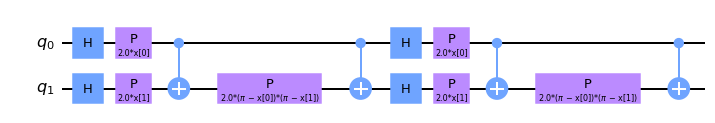

In [7]:
qnn.feature_map.decompose().draw(output='mpl')

#### RealAmplitudes Graph / Real-Amplitudes 2-local circuit.

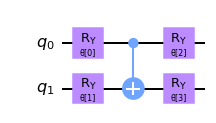

In [8]:
qnn.ansatz.decompose().draw(output='mpl')

### Quantum Entaglement Check

In [9]:
qnn.circuit.parameters

ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3])])

In [12]:
params = np.random.uniform(-1, 1, len(qnn.circuit.parameters))
params

array([ 0.94730744, -0.00976504, -0.02578741, -0.54227068,  0.73976695,
        0.89086699])

In [13]:
rho_01 = DensityMatrix.from_instruction(qnn.circuit.bind_parameters(params))

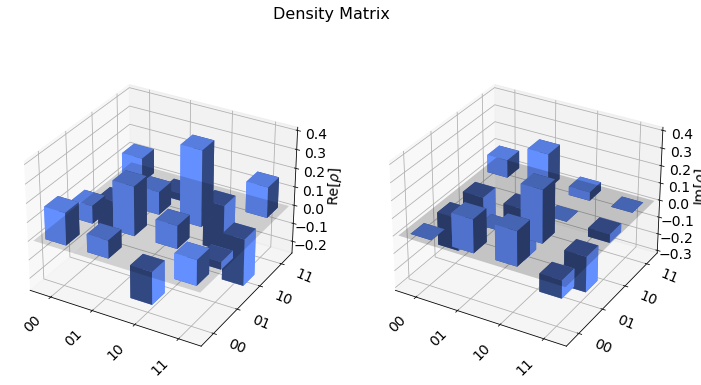

In [19]:
plot_state_city(rho_01.data, title='Density Matrix', figsize=(12,6))

In [80]:
gamma_p = rho_01.purity()
display(rho_01.draw('latex', prefix='\\rho_p = '))
print("State purity: ", np.round(np.real(gamma_p)))

<IPython.core.display.Latex object>

State purity:  1.0


### Pytorch Neural Net Definition 

In [43]:
# Red Neuronal en Pytorch
class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=3)
        self.dropout = Dropout2d()
        self.fc1 = Linear(508032, 128)
        self.fc2 = Linear(128, 2) # QNN binary input
        self.qnn = TorchConnector(qnn) # use TorchConnector to bind quantum node and classic convolutional layers
        self.fc3 = Linear(1, 1)  # Quantum Circuit Output

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # QNN in foward section
        x = self.fc3(x)
        return cat((x, 1 - x), -1)

model = Net(qnn)

### GPU Model Activation

In [44]:
model = model.to('cuda')

### Show Model

In [45]:
print(model)

Net(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=508032, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (qnn): TorchConnector()
  (fc3): Linear(in_features=1, out_features=1, bias=True)
)


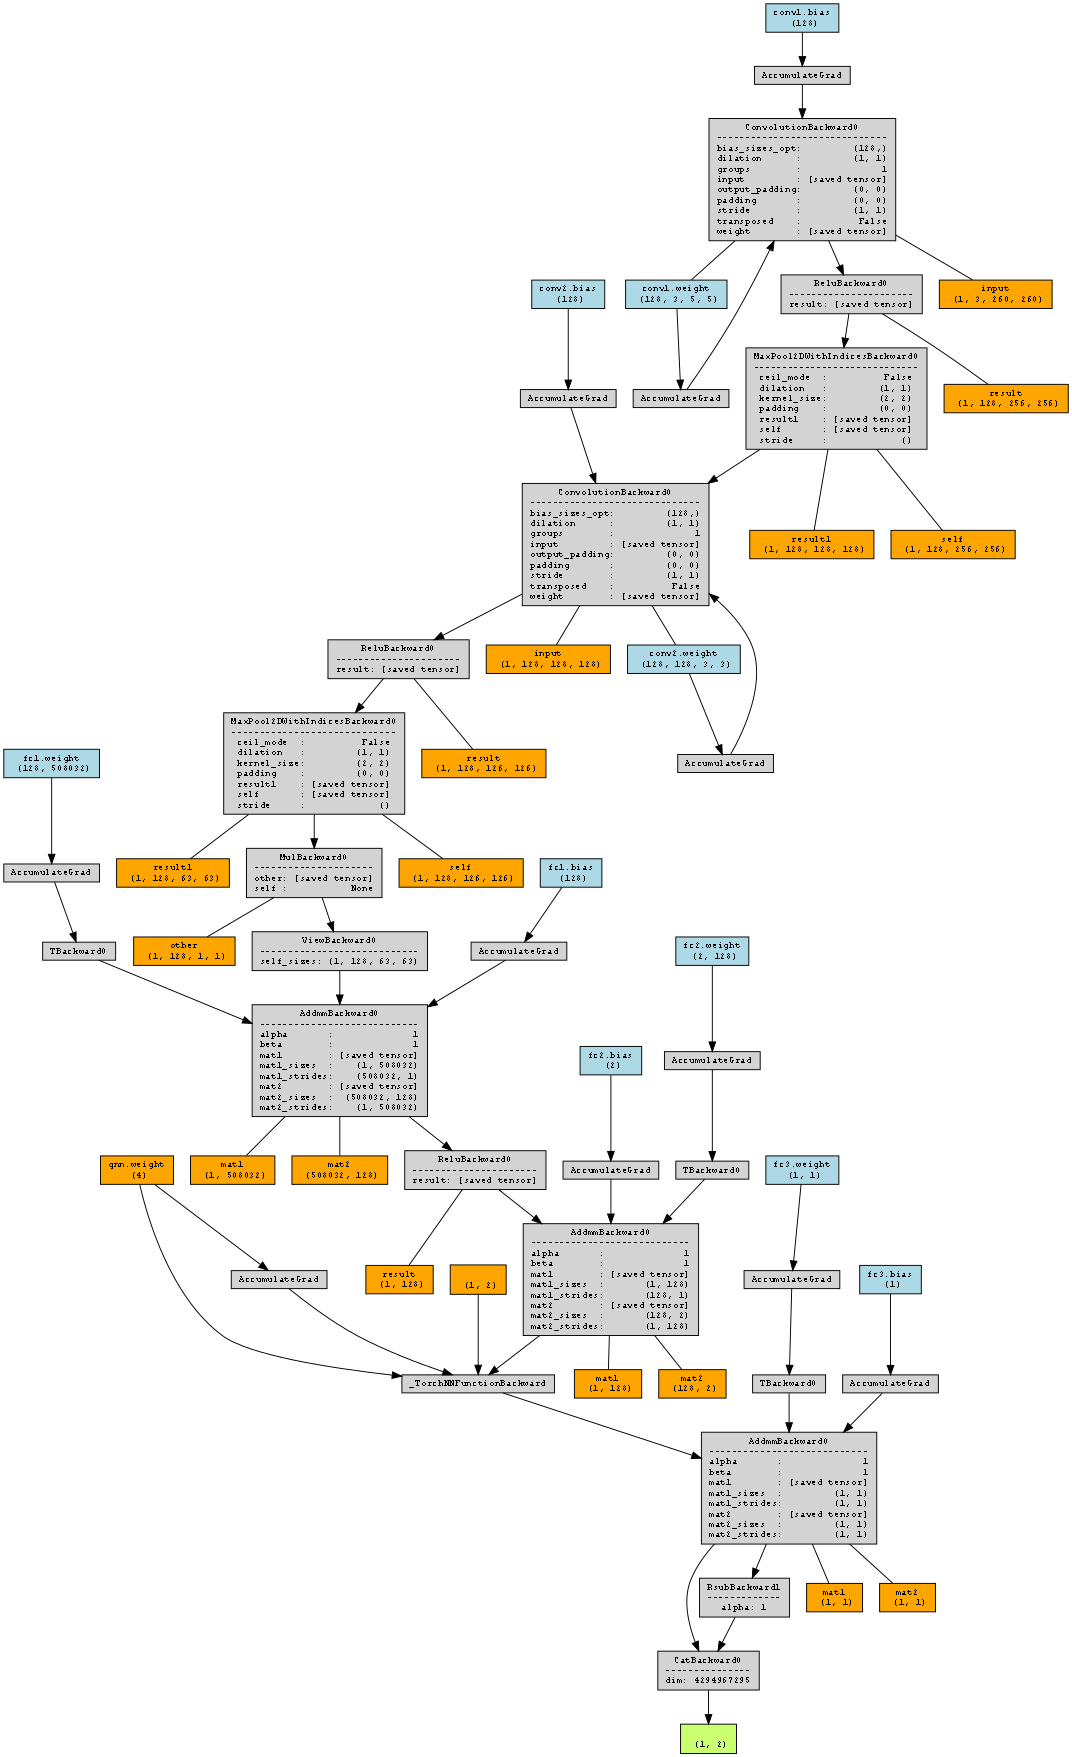

In [76]:
# dummy_tensor = next(iter(train_loader))[0].to('cuda')
# make_dot(model(dummy_tensor), params=dict(list(model.named_parameters())), show_saved=True, show_attrs=True).render("rnn_torchviz", format="png")
#Image('https://raw.githubusercontent.com/contepablod/QCNNCancerClassifier/master/rnn_torchviz.png') 
Image(r'C:\Users\conte\OneDrive\Escritorio\qiskit-fall-fest-peru-2022-main\qiskit-community-tutorials-master\qiskit-community-tutorials-master\drafts\rnn_torchviz.png', width=2000, height=2250)

### Optimisation and Loss Function Definition, and finally training

In [47]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
loss_func = CrossEntropyLoss().to('cuda')


epochs = 50 
model.train() 

loss_list = []  
total_accuracy = []

for epoch in range(epochs):
    correct = 0
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  
        output = model(data.to('cuda'))  # Forward pass, Data to GPU
        loss = loss_func(output, target.to('cuda')) #Labels to GPU
        loss.backward()  # Backward pass
        optimizer.step()
        total_loss.append(loss.item())  
        train_pred = output.argmax(dim=1, keepdim=True)
        correct += train_pred.eq(target.to('cuda').view_as(train_pred)).sum().item()
    loss_list.append(sum(total_loss) / len(total_loss))
    accuracy = 100 * correct / len(train_loader) 
    total_accuracy.append(accuracy) 
    print(f"Training [{100.0 * (epoch + 1) / epochs:.0f}%]\tLoss: {loss_list[-1]:.4f}\tAccuracy: {accuracy:.2f}%")

Training [2%]	Loss: 0.6158	Accuracy: 68.52%
Training [4%]	Loss: 0.5503	Accuracy: 77.73%
Training [6%]	Loss: 0.5232	Accuracy: 81.34%
Training [8%]	Loss: 0.5083	Accuracy: 84.08%
Training [10%]	Loss: 0.4688	Accuracy: 85.84%
Training [12%]	Loss: 0.4375	Accuracy: 88.73%
Training [14%]	Loss: 0.4055	Accuracy: 90.88%
Training [16%]	Loss: 0.3808	Accuracy: 93.07%
Training [18%]	Loss: 0.3613	Accuracy: 93.83%
Training [20%]	Loss: 0.3408	Accuracy: 94.44%
Training [22%]	Loss: 0.3255	Accuracy: 94.53%
Training [24%]	Loss: 0.3108	Accuracy: 95.59%
Training [26%]	Loss: 0.2964	Accuracy: 95.93%
Training [28%]	Loss: 0.2775	Accuracy: 96.90%
Training [30%]	Loss: 0.2647	Accuracy: 96.84%
Training [32%]	Loss: 0.2480	Accuracy: 97.48%
Training [34%]	Loss: 0.2389	Accuracy: 97.57%
Training [36%]	Loss: 0.2232	Accuracy: 97.81%
Training [38%]	Loss: 0.2109	Accuracy: 98.39%
Training [40%]	Loss: 0.1980	Accuracy: 98.69%
Training [42%]	Loss: 0.1890	Accuracy: 98.81%
Training [44%]	Loss: 0.1817	Accuracy: 98.54%
Training [46%]

### Convergence Plot

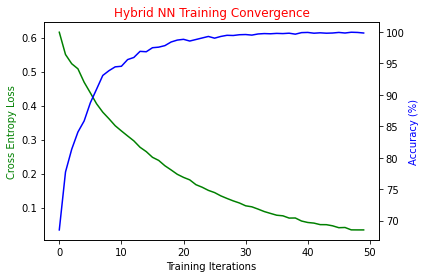

In [48]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, 'g-')
ax2 = ax1.twinx()
ax2.plot(total_accuracy, 'b')
plt.title("Hybrid NN Training Convergence", color='red')
ax1.set_xlabel("Training Iterations")
ax1.set_ylabel("Cross Entropy Loss", color='g')
ax2.set_ylabel("Accuracy (%)", color='b')
plt.show()

### Save Model

In [49]:
torch.save(model.state_dict(), "model.pt")

### Load Model to prediction

In [50]:
qnn1 = create_qnn()
model1 = Net(qnn1)
model1.load_state_dict(torch.load("model.pt"))
model1= model1.to('cuda')

In [55]:
batch_size=1

model1.eval() 
pred_targets = []
test_targets= []
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model1(data.to('cuda'))
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        pred_targets.append(pred.item())
        test_targets.append(target.item())
        correct += pred.eq(target.to('cuda').view_as(pred)).sum().item()

        loss = loss_func(output, target.to('cuda'))
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.2f}%".format(
            sum(total_loss) / len(total_loss), correct / len(test_loader) / batch_size * 100
        )
    )

Performance on test data:
	Loss: 0.0438
	Accuracy: 98.76%


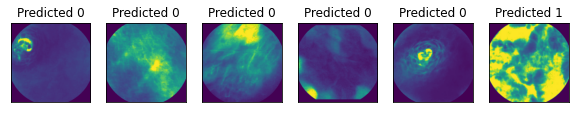

In [52]:
from PIL import Image

n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model1.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model1(data.to('cuda')[0:1])
        if len(output.shape) == 1:
            output = output.reshape(3, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        axes[count].imshow(torchvision.transforms.ToPILImage(mode='RGB')(data[0].squeeze()), cmap=plt.cm.rainbow)

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {}".format(pred.item()))

        count += 1

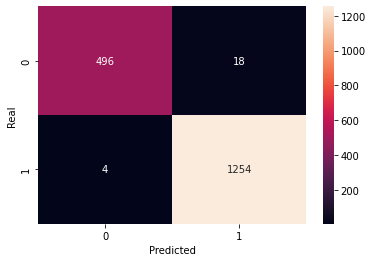

In [54]:
matrix_confusion(test_targets, pred_targets)

# Observations:

-The hybrid neural network has better accuracy than the perceptron. Recall that the input to the perceptron is a matrix representing grayscale images while the input to the neural network is a [3, 260, 260] tensor.

-By vectorizing the image, the Perceptron losses information about the image, although it can be reconstructed. The neural network works with the complete information of the image.

-Could be possible to optimize hyperparameters and architecture of the quantum convolutional neural network.

-The quantum circuit could be improved with more layers.

-This model is built only with educational purposes.

# Referencias

1. Hybrid quantum-classical Neural Networks with PyTorch and Qiskit: https://qiskit.org/textbook/ch-machine-learning/machine-learning-qiskit-pytorch.html

2. Torch Connector and Hybrid QNNs: https://qiskit.org/documentation/machine-learning/tutorials/05_torch_connector.html

3. The Quantum Convolution Neural Network: https://qiskit.org/documentation/machine-learning/tutorials/11_quantum_convolutional_neural_networks.html

4. Clasificador de Cáncer de Esófago: https://github.com/AnIsAsPe/ClassificadorCancerEsofago

5. Machine Learning & IA for the Working Analyst - Colegio de Mátematicas Bourbaki - Mexico
- https://www.colegio-bourbaki.com/
- LinkedIn: Colegio Bourbaki

6. Qiskit Slack Channel (qiskit.slack.com) - Special Thanks to Owen Lockwood & Anton Dekusar